In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("results.csv",sep="\t")

In [3]:
df

,text,ref,pos,predicted
0,و,و,C,و
1,تقدم,تقدم,PSTV,تقدم
2,أوروليانو,أوروليانو,PN,أوروليان
3,في,في,P,في
4,دراسة,دراسة,SFN,دراسة
...,...,...,...,...
497222,مرأة,مرأة,SFN,مرأة
497223,و,و,C,و
497224,ل,ل,P,ل
497225,حسن,حسن,SMN,حسن


# Some Utilities function

In [4]:
def check_results(row):
    if row["ref"] == row["predicted"]:
        return 1
    else:
        return 0
def length(row):
    return len(row["ref"]),len(row["predicted"])
def diff(row):
    return row["pred_len"] - row["ref_len"]
def get_corrected_char(row):
    chars=[]
    for idx,ch in enumerate(row["ref"]):
        if ch != row["predicted"][idx]:
            chars.append((ch,row["predicted"][idx]))
    return chars

def errors_chars(row):
    return ','.join(row['char_pred'].astype(str).values)
# def for_test(row):
#     if row["text"]== "كم" and row["pos"]=="PRO":
#         return "أنتم"
#     elif row["text"]== "ك" and row["pos"]=="PRO":
#         return "أنت"
#     elif row["text"]== "أجمل" and row["pos"]=="AJCMP":
#         return "جميل"
#     elif row["text"]== "إذا" and row["pos"]=="COND":
#         return "إذا"
#     elif row["text"] in ['كنت','ناس','أشعة','شيئا','أخرى','افضل','نساء','أوروليانو','عيني','هى','سلفيت','جهة',
#                              'شئ','اى','ا','ى']:
#         return row["ref"]
        
#     return row["predicted"]

In [5]:
#df["predicted"]=df.apply(for_test,axis=1)

In [6]:
df["check"] = df.apply(check_results,axis=1)

# accuracy
get the accuarcy on testing data

In [7]:
df["check"].mean()

0.963193873220883

## Errors
put the error in specific data frame

In [8]:
errors = df.loc[df["check"]==0]

In [9]:
errors

,text,ref,pos,predicted,check
2,أوروليانو,أوروليانو,PN,أوروليان,0
31,أوروليانو,أوروليانو,PN,أوروليان,0
75,ترميت,ترميت,SMN,ترمي,0
97,أوروليانو,أوروليانو,PN,أوروليان,0
113,ريوهاشا,ريوهاشا,PN,ريوهاش,0
...,...,...,...,...,...
497194,قلت,قال,PSTV,قلت,0
497199,يضير,ضار,PRSV,ضير,0
497200,ك,أنت,PRO,ك,0
497203,نذهب,ذهب,PRSV,وهب,0


# most occurred pos in errors
the most 2 Pos caused errors PIN and PRSV

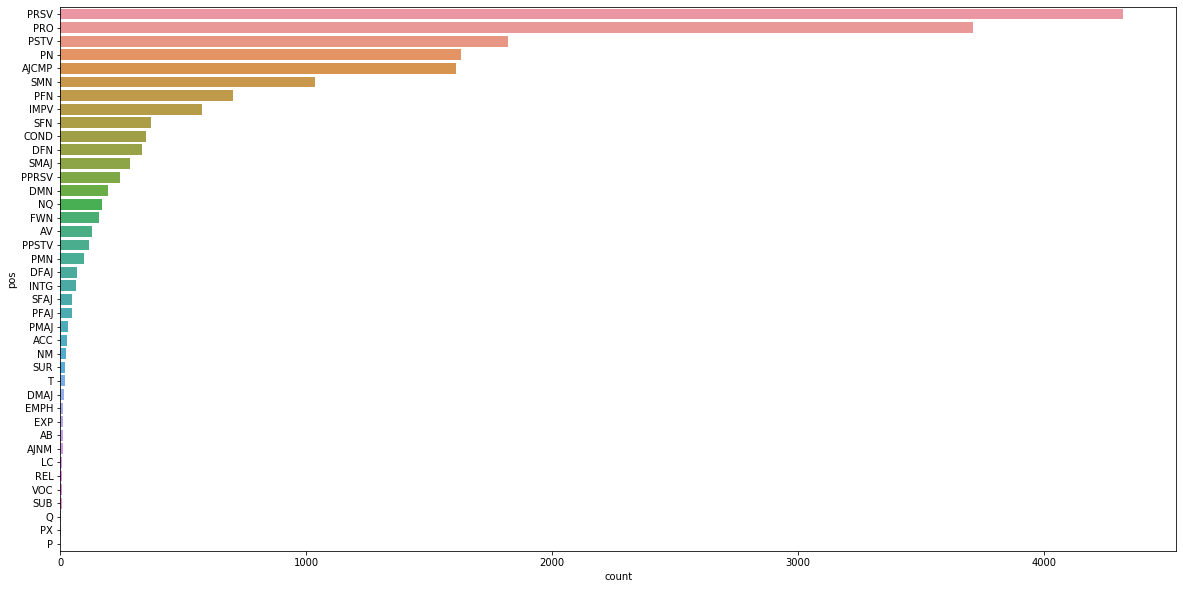

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y='pos',data=errors,order = errors['pos'].value_counts().index)

# Count of each POS caused error

In [12]:
errors["pos"].value_counts()

PRSV     4323
PRO      3714
PSTV     1822
PN       1632
AJCMP    1611
SMN      1035
PFN       701
IMPV      576
SFN       370
COND      349
DFN       331
SMAJ      283
PPRSV     242
DMN       194
NQ        172
FWN       156
AV        129
PPSTV     119
PMN        95
DFAJ       70
INTG       65
SFAJ       50
PFAJ       48
PMAJ       31
ACC        26
NM         23
SUR        18
T          18
DMAJ       16
EMPH       12
EXP        10
AB         10
AJNM       10
LC          9
REL         8
VOC         7
SUB         6
Q           5
PX          4
P           1
Name: pos, dtype: int64

In [23]:
errors["pos"].value_counts().shape[0]

42

## 3873 unique word error
the most three error words -> انت,جميل,إذا

In [24]:
errors["ref"].value_counts()

أنت           3307
جميل          1260
إذا            329
كان            316
أنتم           284
              ... 
استردأ           1
لجلزون           1
لفي              1
سفل              1
يتروكوكسيب       1
Name: ref, Length: 3873, dtype: int64

In [42]:
error_list = errors["text"].value_counts().index.to_list()

In [45]:
error_list

['ك',
 'أجمل',
 'إذا',
 'كم',
 'كنت',
 'ناس',
 'أشعة',
 'شيئا',
 'أخرى',
 'افضل',
 'نساء',
 'أوروليانو',
 'عيني',
 'هى',
 'سلفيت',
 'جهة',
 'شئ',
 'اى',
 'ا',
 'ى',
 'نظم',
 'أرجو',
 'اريد',
 'يريد',
 'معايير',
 'يجد',
 'مخاطر',
 'قلت',
 'ايام',
 'كتب',
 'يطا',
 'القرآن',
 'صماء',
 'لست',
 'بنور',
 'جندوبة',
 'ثياب',
 'شيعة',
 'آثار',
 'ألماس',
 'أوراق',
 'ابدا',
 'دروملاريج',
 'يحب',
 'احست',
 'تنفس',
 'فرق',
 'دماء',
 'يهم',
 'انسة',
 'تقل',
 'خلة',
 'خطط',
 'تصبح',
 'أبناء',
 'اشعة',
 'قوانين',
 'شىء',
 'مبادئ',
 'برامج',
 'حب',
 'رأيت',
 'كبار',
 'حسابات',
 'تضع',
 'أكل',
 'استراتيجيات',
 'قم',
 'نخيل',
 'عجوز',
 'يهود',
 'شرايين',
 'بقية',
 'فجاة',
 'رآ',
 'تبدو',
 'خصائص',
 'أحوال',
 'جئت',
 'دع',
 'أجزاء',
 'تحب',
 'يبرود',
 'كلا',
 'منشآت',
 'يعطي',
 'خليفة',
 'مهما',
 'قرآني',
 'أبرز',
 'اشياء',
 'أمهات',
 'أسئلة',
 'أكودة',
 'قل',
 'اوتار',
 'تخبر',
 'ذراعي',
 'هرقلة',
 'صفوف',
 'آيات',
 'التفت',
 'تعطي',
 'يضع',
 'أشجار',
 'آل',
 'نى',
 'أحب',
 'ينتج',
 'خدم',
 'اشعات',
 'ثا

In [46]:
errors[errors["text"]=="كتب"]

,text,ref,pos,predicted,check
272,كتب,كتاب,PIN,كتبي,0
290,كتب,كتاب,PIN,كتبي,0
3068,كتب,كتاب,PIN,كتبي,0
3263,كتب,كتاب,PIN,كتبي,0
3317,كتب,كتاب,PIN,كتبي,0
6006,كتب,كتاب,PIN,كتبي,0
6033,كتب,كتاب,PIN,كتبي,0
6191,كتب,كتاب,PIN,كتبي,0
6581,كتب,كتاب,PIN,كتبي,0
14642,كتب,كتاب,PIN,كتبي,0


In [51]:
df[(df["text"]=="كتب") & (df["pos"]=="PSTV")]

,text,ref,pos,predicted,check
8264,كتب,كتب,PSTV,كتب,1
14960,كتب,كتب,PSTV,كتب,1
22479,كتب,كتب,PSTV,كتب,1
39017,كتب,كتب,PSTV,كتب,1
43266,كتب,كتب,PSTV,كتب,1
43276,كتب,كتب,PSTV,كتب,1
60438,كتب,كتب,PSTV,كتب,1
73316,كتب,كتب,PSTV,كتب,1
73712,كتب,كتب,PSTV,كتب,1
75089,كتب,كتب,PSTV,كتب,1


In [26]:
errors[errors["text"]=="ك"]

,text,ref,pos,predicted,check
163,ك,أنت,PRO,ك,0
280,ك,أنت,PRO,ك,0
1103,ك,أنت,PRO,ك,0
1393,ك,أنت,PRO,ك,0
1395,ك,أنت,PRO,ك,0
...,...,...,...,...,...
497012,ك,أنت,PRO,ك,0
497059,ك,أنت,PRO,ك,0
497066,ك,أنت,PRO,ك,0
497149,ك,أنت,PRO,ك,0


In [38]:
errors[errors["text"]=="بلايا"]

,text,ref,pos,predicted,check
419,بلايا,بلية,PIN,بليا,0


,text,ref,pos,predicted,check


In [193]:
errors[errors["text"]=="كنت"]

,text,ref,pos,predicted,check
2846,كنت,كان,PSTV,كنن,0
2899,كنت,كان,PSTV,كنن,0
3125,كنت,كان,PSTV,كنن,0
4249,كنت,كان,PSTV,كنن,0
4986,كنت,كان,PSTV,كنن,0
...,...,...,...,...,...
494498,كنت,كان,PSTV,كنن,0
495557,كنت,كان,PSTV,كنن,0
495684,كنت,كان,PSTV,كنن,0
496950,كنت,كان,PSTV,كنن,0


In [196]:
errors[errors["text"]=="أشعة"]

,text,ref,pos,predicted,check
34728,أشعة,شعاع,PIN,شععع,0
89667,أشعة,شعاع,PIN,شععع,0
89757,أشعة,شعاع,PIN,شععع,0
90924,أشعة,شعاع,PIN,شععع,0
90930,أشعة,شعاع,PIN,شععع,0
...,...,...,...,...,...
380339,أشعة,شعاع,PIN,شععع,0
409212,أشعة,شعاع,PIN,شععع,0
416418,أشعة,شعاع,PIN,شععع,0
416421,أشعة,شعاع,PIN,شععع,0


In [197]:
errors[errors["text"]=="شيئا"]

,text,ref,pos,predicted,check
1141,شيئا,شيء,SMN,شيئ,0
1342,شيئا,شيء,SMN,شيئ,0
4217,شيئا,شيء,SMN,شيئ,0
4857,شيئا,شيء,SMN,شيئ,0
5383,شيئا,شيء,SMN,شيئ,0
...,...,...,...,...,...
495464,شيئا,شيء,SMN,شيئ,0
495542,شيئا,شيء,SMN,شيئ,0
495569,شيئا,شيء,SMN,شيئ,0
495710,شيئا,شيء,SMN,شيئ,0


In [200]:
errors[errors["text"]=="أخرى"]

,text,ref,pos,predicted,check
1134,أخرى,آخر,NQ,أخرى,0
3574,أخرى,آخر,PIAJ,أخرى,0
3800,أخرى,آخر,NQ,أخرى,0
3813,أخرى,آخر,NQ,أخرى,0
5450,أخرى,آخر,PIAJ,أخرى,0
...,...,...,...,...,...
473451,أخرى,آخر,PIAJ,أخرى,0
476745,أخرى,آخر,PIAJ,أخرى,0
479083,أخرى,آخر,PIAJ,أخرى,0
488284,أخرى,آخر,NQ,أخرى,0


In [158]:
errors[errors["text"]=="كان"]

,text,ref,pos,predicted,check
429392,كان,كأن,ACC,كان,0
439460,كان,كأن,ACC,كان,0
439550,كان,كأن,ACC,كان,0
441357,كان,كأن,ACC,كان,0
441874,كان,كأن,ACC,كان,0
443198,كان,كأن,ACC,كان,0
443326,كان,كأن,ACC,كان,0
446020,كان,كأن,ACC,كان,0
449616,كان,كأن,ACC,كان,0
450471,كان,كأن,ACC,كان,0


In [204]:
errors[errors["text"]=="افضل"]

,text,ref,pos,predicted,check
89226,افضل,مفضل,AJCMP,ففضل,0
91580,افضل,مفضل,AJCMP,ففضل,0
92519,افضل,مفضل,AJCMP,ففضل,0
93785,افضل,مفضل,AJCMP,ففضل,0
96224,افضل,مفضل,AJCMP,ففضل,0
...,...,...,...,...,...
465054,افضل,مفضل,AJCMP,ففضل,0
465068,افضل,مفضل,AJCMP,ففضل,0
465076,افضل,مفضل,AJCMP,ففضل,0
465085,افضل,مفضل,AJCMP,ففضل,0


In [205]:
errors[errors["text"]=="نساء"]

,text,ref,pos,predicted,check
3279,نساء,إمرأة,PIN,إساءة,0
4142,نساء,إمرأة,PIN,إساءة,0
4159,نساء,إمرأة,PIN,إساءة,0
4295,نساء,إمرأة,PIN,إساءة,0
4300,نساء,إمرأة,PIN,إساءة,0
...,...,...,...,...,...
472308,نساء,إمرأة,PIN,إساءة,0
473060,نساء,إمرأة,PIN,إساءة,0
480607,نساء,إمرأة,PIN,إساءة,0
480708,نساء,إمرأة,PIN,إساءة,0


In [217]:
errors[errors["pos"]=="PRSV"]

,text,ref,pos,predicted,check
115,تقيم,أقام,PRSV,وقىم,0
228,يتجه,اتجه,PRSV,تتجه,0
594,تدرك,أدرك,PRSV,دركك,0
638,يجد,وجد,PRSV,أجد,0
770,يحب,أحب,PRSV,ححب,0
...,...,...,...,...,...
496958,ألف,لف,PRSV,أفف,0
496964,أجد,وجد,PRSV,ودد,0
497081,أقول,قال,PRSV,قول,0
497199,يضير,ضار,PRSV,ضير,0


In [104]:
word_error.index.to_list()

['أنت',
 'جميل',
 'إذا',
 'كان',
 'أنتم',
 'شعاع',
 'رأى',
 'شيء',
 'إنسان',
 'أراد',
 'آخر',
 'قال',
 'إمرأة',
 'مفضل',
 'عين',
 'أوروليانو',
 'وجد',
 'رجا',
 'أعطى',
 'أحب',
 'هى',
 'سلفيت',
 'جهة',
 'نظام',
 'شء',
 'وضع',
 'حال',
 'اى',
 'أ',
 'يوم',
 'ليس',
 'معيار',
 'خطر',
 'كتاب',
 'أخبر',
 'نسي',
 'ابن',
 'يطا',
 'أعاد',
 'القرآن',
 'ثوب',
 'اشترى',
 'أصم',
 'بنور',
 'ذهب',
 'جندوبة',
 'أب',
 'مات',
 'ظن',
 'أكل',
 'حب',
 'التقى',
 'أثر',
 'أدرك',
 'أقام',
 'استطاع',
 'شيعي',
 'كبير',
 'ألماس',
 'هم',
 'أفاد',
 'علم',
 'أصبح',
 'قام',
 'ورقة',
 'سؤال',
 'جاء',
 'دم',
 'ودع',
 'ابدا',
 'دروملاريج',
 'أتى',
 'أخذ',
 'سمى',
 'قرآني',
 'يد',
 'ألقى',
 'تنفس',
 'احس',
 'بدى',
 'فريق',
 'أقل',
 'انسة',
 'خطة',
 'ارتدى',
 'خلة',
 'اسم',
 'برنامج',
 'مبدأ',
 'جزء',
 'درى',
 'أنتج',
 'شىء',
 'فعل',
 'قانون',
 'ذكر',
 'كل',
 'ثانية',
 'غذاء',
 'حساب',
 'خليفة',
 'نعجة',
 'عجوز',
 'سر',
 'نخلة',
 'استراتيجية',
 'بدأ',
 'باع',
 'بقية',
 'طلب',
 'وعاء',
 'منشأة',
 'شريان',
 'مضى',
 'صف',
 '

In [58]:
errors[["ref_len","pred_len"]] =errors.apply(length,axis=1,result_type="expand")

/home/zaghlol/projects/lemmetization/venv/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [59]:
errors

,ref,pos,predicted,check,ref_len,pred_len
2,أوروليانو,PN,أوروليان,0,9,8
31,أوروليانو,PN,أوروليان,0,9,8
55,رمل,PIN,رال,0,3,3
68,تراب,PIN,تربية,0,4,5
75,ترميت,SMN,ترمي,0,5,4
...,...,...,...,...,...,...
497194,قال,PSTV,قلت,0,3,3
497199,ضار,PRSV,ضير,0,3,3
497200,أنت,PRO,ك,0,3,1
497203,ذهب,PRSV,وهب,0,3,3


## the diffrence between reffrence length and predicted length

In [61]:
errors["diff"] = errors.apply(diff,axis=1)

/home/zaghlol/projects/lemmetization/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
errors

,ref,pos,predicted,check,ref_len,pred_len,diff
2,أوروليانو,PN,أوروليان,0,9,8,-1
31,أوروليانو,PN,أوروليان,0,9,8,-1
55,رمل,PIN,رال,0,3,3,0
68,تراب,PIN,تربية,0,4,5,1
75,ترميت,SMN,ترمي,0,5,4,-1
...,...,...,...,...,...,...,...
497194,قال,PSTV,قلت,0,3,3,0
497199,ضار,PRSV,ضير,0,3,3,0
497200,أنت,PRO,ك,0,3,1,-2
497203,ذهب,PRSV,وهب,0,3,3,0


## Error that the ref and predicted have the same length

In [106]:
errors_with_the_same_len=errors[errors["diff"]==0]

In [65]:
errors_with_the_same_len

,ref,pos,predicted,check,ref_len,pred_len,diff
55,رمل,PIN,رال,0,3,3,0
115,أقام,PRSV,وقىم,0,4,4,0
126,أعطى,PSTV,أعطا,0,4,4,0
160,ذهب,IMPV,ذذه,0,3,3,0
228,اتجه,PRSV,تتجه,0,4,4,0
...,...,...,...,...,...,...,...
497139,قال,PSTV,قلت,0,3,3,0
497177,قال,PSTV,قلت,0,3,3,0
497194,قال,PSTV,قلت,0,3,3,0
497199,ضار,PRSV,ضير,0,3,3,0


## Error in Chars

In [68]:
errors_with_the_same_len["chars_error"] = errors_with_the_same_len.apply(get_corrected_char,axis=1)

/home/zaghlol/projects/lemmetization/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
errors_with_the_same_len

,ref,pos,predicted,check,ref_len,pred_len,diff,chars_error
55,رمل,PIN,رال,0,3,3,0,"[(م, ا)]"
115,أقام,PRSV,وقىم,0,4,4,0,"[(أ, و), (ا, ى)]"
126,أعطى,PSTV,أعطا,0,4,4,0,"[(ى, ا)]"
160,ذهب,IMPV,ذذه,0,3,3,0,"[(ه, ذ), (ب, ه)]"
228,اتجه,PRSV,تتجه,0,4,4,0,"[(ا, ت)]"
...,...,...,...,...,...,...,...,...
497139,قال,PSTV,قلت,0,3,3,0,"[(ا, ل), (ل, ت)]"
497177,قال,PSTV,قلت,0,3,3,0,"[(ا, ل), (ل, ت)]"
497194,قال,PSTV,قلت,0,3,3,0,"[(ا, ل), (ل, ت)]"
497199,ضار,PRSV,ضير,0,3,3,0,"[(ا, ي)]"


In [83]:
char_ref = []
char_pred = []
for idx,row in errors_with_the_same_len.iterrows():
    for tup in row["chars_error"]:
        char_ref.append(tup[0])
        char_pred.append(tup[1])


In [84]:
data = {"char_ref":char_ref,"char_pred":char_pred}
char_error = pd.DataFrame(data)

In [85]:
char_error

,char_ref,char_pred
0,م,ا
1,أ,و
2,ا,ى
3,ى,ا
4,ه,ذ
...,...,...
15859,ل,ت
15860,ا,ل
15861,ل,ت
15862,ا,ي


## 36 from 200 unique chars make error

In [87]:
char_error["char_ref"].value_counts()

ا    2551
ي    2247
أ    1764
ج    1422
ى     908
و     722
ء     612
ر     503
ة     460
ت     459
م     420
ن     401
ل     290
س     253
د     239
ع     235
ب     228
آ     217
إ     199
ح     186
خ     163
ك     159
ص     137
ه     131
ئ     131
ط     128
ف     128
ق     112
ض     103
ش      87
ؤ      66
ذ      66
ز      51
ظ      32
غ      32
ث      22
Name: char_ref, dtype: int64

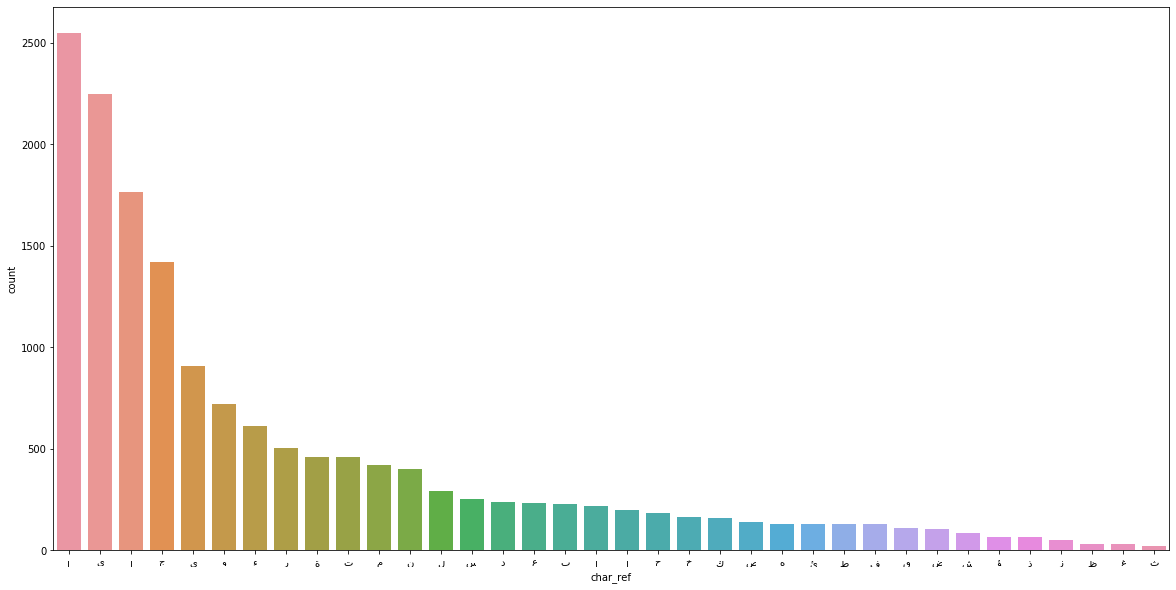

In [89]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='char_ref',data=char_error,order = char_error['char_ref'].value_counts().index)

In [91]:
char_error["char_ref"].value_counts().shape[0]

36

# patterns in Chars errors

In [110]:
char_error.groupby("char_ref").apply(errors_chars).to_frame("errors_char")

,errors_char
char_ref,
ء,"ئ,ئ,ئ,ئ,ئ,ئ,ئ,ئ,ئ,ئ,ئ,ة,ئ,ئ,ئ,ئ,ض,ئ,ئ,ئ,ئ,ئ,ئ,..."
آ,"أ,أ,أ,أ,ر,أ,أ,أ,أ,أ,أ,ر,أ,ت,أ,أ,ت,أ,أ,أ,أ,أ,أ,..."
أ,"و,و,د,ح,ع,م,د,ه,ك,ط,ر,د,خ,ء,ص,و,ر,ر,ء,ء,د,ء,ء,..."
ؤ,"س,ء,أ,س,ب,أ,س,أ,ب,أ,أ,ظ,ب,س,س,س,س,س,س,س,س,أ,أ,..."
إ,"ن,ن,آ,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,ن,..."
ئ,"ا,ا,ة,ع,ع,ع,ع,ا,ز,ؤ,ب,ب,ء,ر,ة,ي,د,ب,ؤ,ؤ,ع,ع,ي,..."
ا,"ى,ت,ب,ب,ص,و,ص,م,ن,ت,ص,ع,و,س,ف,ي,ي,ي,ي,ن,ن,ن,ب,..."
ب,"ه,ي,ي,ق,أ,ه,أ,أ,ي,أ,ي,ي,ا,ه,ي,ي,ي,ي,ر,ر,ي,ر,ي,..."
ة,"ا,ي,ي,ف,ى,ت,م,ا,م,م,م,م,م,ب,ا,ى,ى,ى,ى,ر,ر,ر,ت,..."


# Training data

In [27]:
with open('train_x.pickle', 'rb') as f:
    arr_x = pickle.load(f)
with open('train_y.pickle', 'rb') as f:
    arr_y = pickle.load(f)
with open('train_p.pickle', 'rb') as f:
    arr_p = pickle.load(f)

In [28]:
training_data = {"text":arr_x,"pos": arr_p,"lemmas":arr_y}
training_df = pd.DataFrame(training_data)

In [29]:
training_df

,text,pos,lemmas
0,ذهب عامل إلى ال صيدلية و قال ل ال صيدلي هل لدي...,PSTV SMN P D SFN C PSTV P D SMN Q LC PRO SMN P...,ذهب عامل إلى ال صيدلية و قال ل ال صيدلي هل لدى...
1,هل تريد نوعية ممتازة مستوردة أم نوعية عادية مص...,Q PRSV SFN SFAJ SFAJ C SFN SFAJ SFAJ P D PIN C...,هل أراد نوعية ممتاز مستورد أم نوعية عادي مصنوع...
2,رد علي ه ال صيدلي ساخرا إن ها غالية أقول ل ك ذ...,PSTV P PRO D SMN SMAJ ACC PRO SFAJ PRSV P PRO ...,رد على هو ال صيدلي ساخر إن هي غالي قال ل أنت ذ...
3,رفع ال عامل يدي ه أمام ال صيدلي و قال ل ه إن ي...,PSTV D SMN DFN PRO LC D SMN C PSTV P PRO ACC P...,رفع ال عامل يد هو أمام ال صيدلي و قال ل هو إن ...
4,إذا كانت ال نوعية ال ممتازة ال مستوردة التي لد...,COND PSTV D SFN D SFAJ D SFAJ REL LC PRO PRSV ...,إذا كان ال نوعية ال ممتاز ال مستورد التي لدى أ...
...,...,...,...
50741,لم يعترف أحد ب اغتيال ه إلا في ال سنوات ال أخي...,NEG PRSV NM P SMN PRO RES P D PFN D PFAJ PX,لم اعترف أحد ب اغتيال هو إلا في ال سنة ال أخير .
50742,عند ما كنت أكتب عن هذا ال رجل و أستعيد ال صراع...,T PREV PSTV PRSV P DM D SMN C PRSV D PFN D PFA...,عند ما كان كتب عن هذا ال رجل و استعاد ال صراع ...
50743,و صودر ال نص الذي طبع في بيروت و دمشق ب عدم إد...,C PPSTV D SMN REL PPSTV P PN C PN P SMN SMN PR...,و صادر ال نص الذي طبع في بيروت و دمشق ب عدم إد...
50744,ال طريقة ال مثلى ل حرمان ال قارئ ال جزائري من ...,D SFN D SFAJ P SMN D SMN D SMAJ P SMN PRO AJNM...,ال طريقة ال مثلى ل حرمان ال قارء ال جزائري من ...


In [30]:
def check_most_error_word(row):
    if "ك" in row["text"]:
        return 1
    elif "جميل" in row["text"]:
        return 2
    elif "إذا" in row["text"]:
        return 3
    elif "كان" in row["text"]:
        return 4
    else:
        return 0
    
    

In [31]:
training_df["error_level"] = training_df.apply(check_most_error_word,axis=1)

In [32]:
level_1 = training_df[training_df["error_level"]==1]

In [33]:
level_1

,text,pos,lemmas,error_level
0,ذهب عامل إلى ال صيدلية و قال ل ال صيدلي هل لدي...,PSTV SMN P D SFN C PSTV P D SMN Q LC PRO SMN P...,ذهب عامل إلى ال صيدلية و قال ل ال صيدلي هل لدى...,1
2,رد علي ه ال صيدلي ساخرا إن ها غالية أقول ل ك ذ...,PSTV P PRO D SMN SMAJ ACC PRO SFAJ PRSV P PRO ...,رد على هو ال صيدلي ساخر إن هي غالي قال ل أنت ذ...,1
3,رفع ال عامل يدي ه أمام ال صيدلي و قال ل ه إن ي...,PSTV D SMN DFN PRO LC D SMN C PSTV P PRO ACC P...,رفع ال عامل يد هو أمام ال صيدلي و قال ل هو إن ...,1
4,إذا كانت ال نوعية ال ممتازة ال مستوردة التي لد...,COND PSTV D SFN D SFAJ D SFAJ REL LC PRO PRSV ...,إذا كان ال نوعية ال ممتاز ال مستورد التي لدى أ...,1
5,تجمدت ال ضحكات ال ساخرة ل ال صيدلي على شفتي ه ...,PSTV D PFN D PFAJ P D SMN P DFN PRO C PSTV SFN...,تجمد ال ضحكة ال ساخر ل ال صيدلي على شفة هو و ر...,1
...,...,...,...,...
50738,ال خبر الذي وصلنا كان مفجعا .,D SMN REL PSTV PSTV SMAJ PX,ال خبر الذي وصل كان مفجع .,1
50740,نبكي ال يوم ب مرارة افتقاد أخ في ال نضال س تظل...,PRSV D SMN P SFN SMN SMN P D SMN FUT PRSV SFN ...,بكى ال يوم ب مرارة افتقاد أخ في ال نضال سوف ظل...,1
50742,عند ما كنت أكتب عن هذا ال رجل و أستعيد ال صراع...,T PREV PSTV PRSV P DM D SMN C PRSV D PFN D PFA...,عند ما كان كتب عن هذا ال رجل و استعاد ال صراع ...,1
50744,ال طريقة ال مثلى ل حرمان ال قارئ ال جزائري من ...,D SFN D SFAJ P SMN D SMN D SMAJ P SMN PRO AJNM...,ال طريقة ال مثلى ل حرمان ال قارء ال جزائري من ...,1


In [178]:
level_1.iloc[0]["text"]

'ذهب عامل إلى ال صيدلية و قال ل ال صيدلي هل لدي ك مرهم ل ال أسمنت ف ضحك ال صيدلي من ه ساخرا و قال ل ه نعم لدي نا و لدي نا مرهم ل ال حجر و ل ال حديد .'

In [179]:
level_1.iloc[0]["lemmas"]

'ذهب عامل إلى ال صيدلية و قال ل ال صيدلي هل لدى أنت مرهم ل ال أسمنت ف ضحك ال صيدلي من هو ساخر و قال ل هو نعم لدى نحن و لدى نحن مرهم ل ال حجر و ل ال حديد .'

In [126]:
level_1.iloc[0]["pos"]

'C PSTV IMPV C PSTV C PSTV P PRO SMN PRO P SFN PRO C PSTV INTG PRSV DM C T PSTV PRO PSTV C PPSTV P PRO C NEG PSTV RES T SFN C PSTV P PRO VOC DM INTG SMN PRO C SMN C PSTV PRO PRSV PRO P DM C DM SFN REM T PSTV PRO DM D SFN PRSV REL PSTV PRO C PSTV PRO P D SFN C PSTV PRO PSTV SUB PRSV PRO P D SMN SMN PRO C PSTV SUB PPRSV P PRO C PSTV PRO D PIN REL PSTV PRO ACC PRO SFN C ACC PREV PSTV PRO PRO P SMN PRO C IMPV SMN PRO C IMPV PRO P SMN C PSTV PRO C PSTV P PRO PX'

In [159]:
level_3 = training_df[training_df["error_level"]==3]

In [170]:
level_3.iloc[50]["text"].split(" ")

['و',
 'يستغرب',
 'فينسان',
 'كون',
 'مملكة',
 'كوش',
 'لا',
 'تتمتع',
 'ب',
 'ال',
 'سمعة',
 'نفس',
 'ها',
 'التي',
 'توجد',
 'لدى',
 'جيران',
 'ها',
 'ال',
 'مصريين',
 'و',
 'ينقل',
 'في',
 'هذا',
 'ال',
 'إطار',
 'قول',
 'كلود',
 'ريلي',
 'يمكن',
 'نا',
 'ال',
 'تحدث',
 'عن',
 'جانبين',
 'ل',
 'ال',
 'حضارة',
 'ال',
 'فرعونية',
 'نفس',
 'ها',
 'لكن',
 'ال',
 'بحوث',
 'ال',
 'أثرية',
 'ظلت',
 'مدة',
 'طويلة',
 'تهمل',
 'هذه',
 'ال',
 'منطقة',
 'و',
 'ل',
 'ذلك',
 'لا',
 'يملك',
 'ال',
 'باحثون',
 'حاليا',
 'سوى',
 'نص',
 'من',
 'هذه',
 'ال',
 'منطقة',
 'م',
 'ما',
 'يعطي',
 'اكتشافات',
 'صدنقا',
 'أهمية',
 'خاصة',
 'خصوصا',
 'إذا',
 'نجحنا',
 'في',
 'فك',
 'رموز',
 'ال',
 'نصوص',
 'ال',
 'مقدسة',
 'إذ',
 'ما',
 'زلنا',
 'لا',
 'نستطيع',
 'فهم',
 'ال',
 'لغة',
 'ب',
 'شكل',
 'صحيح',
 'ف',
 'قراءة',
 'لغة',
 'ما',
 'لا',
 'تعني',
 'ب',
 'ال',
 'ضرورة',
 'فهم',
 'ها',
 'على',
 'حد',
 'تعبير',
 'ال',
 'باحث',
 '.']

In [171]:
level_3.iloc[50]["lemmas"].split(" ")

['و',
 'استغرب',
 'فينسان',
 'كون',
 'مملكة',
 'كوش',
 'لا',
 'تمتع',
 'ب',
 'ال',
 'سمعة',
 'نفس',
 'هي',
 'التي',
 'وجد',
 'لدى',
 'جار',
 'هي',
 'ال',
 'مصري',
 'و',
 'نقل',
 'في',
 'هذا',
 'ال',
 'إطار',
 'قول',
 'كلود',
 'ريلي',
 'مكن',
 'نحن',
 'ال',
 'تحدث',
 'عن',
 'جانب',
 'ل',
 'ال',
 'حضارة',
 'ال',
 'فرعوني',
 'نفس',
 'هي',
 'لكن',
 'ال',
 'بحث',
 'ال',
 'أثري',
 'ظل',
 'مدة',
 'طويل',
 'همل',
 'هذه',
 'ال',
 'منطقة',
 'و',
 'ل',
 'ذلك',
 'لا',
 'ملك',
 'ال',
 'باحث',
 'حاليا',
 'سوى',
 'نص',
 'من',
 'هذه',
 'ال',
 'منطقة',
 'من',
 'ما',
 'أعطى',
 'اكتشاف',
 'صدنقا',
 'أهمية',
 'خاص',
 'خصوصا',
 'إذا',
 'نجح',
 'في',
 'فك',
 'رمز',
 'ال',
 'نص',
 'ال',
 'مقدس',
 'إذ',
 'ما',
 'زال',
 'لا',
 'استطاع',
 'فهم',
 'ال',
 'لغة',
 'ب',
 'شكل',
 'صحيح',
 'ف',
 'قراءة',
 'لغة',
 'ما',
 'لا',
 'عنى',
 'ب',
 'ال',
 'ضرورة',
 'فهم',
 'هي',
 'على',
 'حد',
 'تعبير',
 'ال',
 'باحث',
 '.']

In [169]:
level_3.iloc[1]["pos"].split(" ")

['C',
 'PSTV',
 'PRO',
 'D',
 'SMN',
 'C',
 'Q',
 'PSTV',
 'SFN',
 'PRO',
 'C',
 'PSTV',
 'D',
 'SMN',
 'SFN',
 'PRO',
 'PSTV',
 'PRSV',
 'D',
 'PIN',
 'P',
 'D',
 'PIN',
 'T',
 'PRO',
 'PSTV',
 'P',
 'PRO',
 'D',
 'SMN',
 'SUB',
 'PRSV',
 'PRO',
 'DFN',
 'PRO',
 'C',
 'PSTV',
 'PRO',
 'PRO',
 'C',
 'COND',
 'PRO',
 'DFN',
 'DFAJ',
 'C',
 'DFAJ',
 'PX']